In [5]:
from invisible_cities.cities.components import wf_from_files, WfType
from invisible_cities.cities.components import deconv_pmt, calibrate_pmts, get_pmt_wfs, load_dst
from invisible_cities.io.pmaps_io import load_pmaps
from invisible_cities.io.pmaps_io import load_pmaps_as_df
import pandas as pd
import numpy as np
import tables as tb
import os
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from mpl_interactions import ioff, panhandler, zoom_factory
import glob
from matplotlib.colors import LogNorm

In [6]:
# Load in the pmaps from the data

pmaps_data = load_pmaps_as_df("../data/run_13852_0000_ldc1_trg0_irene.h5")

s1_pmaps_data = pmaps_data[0]
s2_pmaps_data = pmaps_data[1]

event_energy_sum = s2_pmaps_data.groupby('event')['ene'].sum()

# Get events where summed energy is greater than or equal to the threshold
valid_events = event_energy_sum[ (event_energy_sum >= 50000)].index

# Step 2: Filter for events that pass the time threshold condition
# Find the events where the sum of 'ene' after a certain 'time' is above the post_time_energy_threshold
df_post_time = s2_pmaps_data[ (s2_pmaps_data['time'] > 1200000) & (s2_pmaps_data['time'] < 1700000)]
event_energy_post_time = df_post_time.groupby('event')['ene'].sum()
print(event_energy_post_time)

# Get the events where the sum of energy after the time is less than or equal to the threshold
valid_events_after_time = event_energy_post_time[event_energy_post_time <= 10000].index

# Step 3: Combine both conditions
final_valid_events = valid_events.intersection(valid_events_after_time)

# Filter the original DataFrame to include only these events
s2_pmaps_data = s2_pmaps_data[s2_pmaps_data['event'].isin(final_valid_events)]



# want event 37
display(s1_pmaps_data)
print(s2_pmaps_data.event.unique())

event
2      2132.604492
9        75.113518
16     1069.485107
30     1253.019165
37     1788.567749
          ...     
569     544.142029
576    1905.329346
583    1181.718506
590    1288.830078
597     944.979309
Name: ene, Length: 85, dtype: float32


,event,peak,time,bwidth,ene
0,9,0,1925.0,25.0,0.364390
1,9,0,1950.0,25.0,0.638245
2,9,0,1975.0,25.0,0.906407
3,9,0,2000.0,25.0,0.763632
4,9,0,2025.0,25.0,0.396182
...,...,...,...,...,...
25245,597,0,216500.0,25.0,0.430239
25246,597,0,216525.0,25.0,0.662060
25247,597,0,216550.0,25.0,0.525257
25248,597,0,216575.0,25.0,0.622339


[  9  16  37  44  51  58  72  79  93 100 107 121 128 142 149 156 170 177
 184 191 198 212 219 247 254 261 268 303 317 331 338 352 359 380 401 408
 415 422 436 443 450 457 471 485 499 513 520 534 548 555 569 576 597]


,event,peak,time,bwidth,ene
788,9,0,9.678671e+05,150.0,0.263297
789,9,0,9.684176e+05,1000.0,-2.806824
790,9,0,9.694283e+05,1000.0,-2.039917
791,9,0,9.704732e+05,1000.0,-1.637952
792,9,0,9.713952e+05,1000.0,-3.972695
...,...,...,...,...,...
75473,597,16,1.995454e+06,1000.0,1.580476
75474,597,16,1.996508e+06,1000.0,0.796220
75475,597,16,1.997578e+06,1000.0,5.257108
75476,597,16,1.998491e+06,1000.0,1.810919


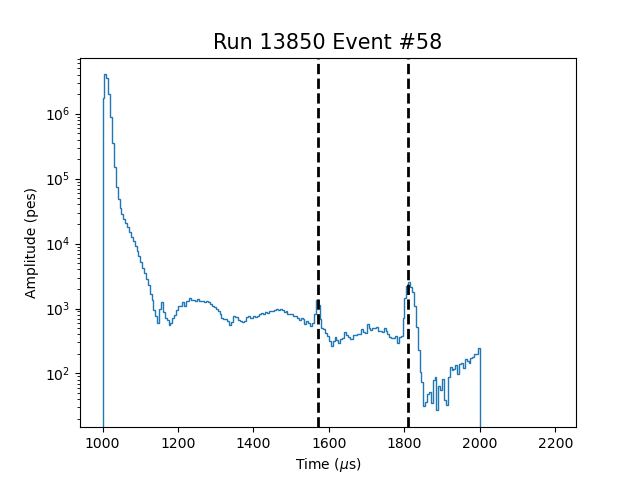

In [13]:
%matplotlib widget
s1s_data, s2s_data, s2sis, s1pmts, s2pmts = pmaps_data

plt.figure()

# for index, eventid in enumerate(s1s_data.event.unique()):
    # print(eventid)

    # if index > 5: break


eventid = 58

s1s_data   = s1s_data  .loc[lambda df: df.event == eventid]
s2s_data   = s2s_data  .loc[lambda df: df.event == eventid]
# s2sis = s2sis.loc[lambda df: df.event == eventid]

# for _, s1 in s1s_data.groupby("peak"):
#     plt.plot(s1.time / 1e3, s1.ene) # plot the PMT-summed waveform slice

display(s2_pmaps_data)

plt.hist(s2_pmaps_data.time / 1e3, weights = s2_pmaps_data.ene, bins = np.arange(1000,2200,5), log = True, histtype = "step")
# plt.hist(s2s_data.time / 1e3, weights = s2s_data.ene, bins = np.arange(1000,2200,5), log = True)


# for _, s2 in s2s_data.groupby("peak"):
    # plt.plot(s2.time / 1e3, s2.ene) # plot the PMT-summed waveform slice
    # plt.hist(s2.time / 1e3, weights = s2.ene, bins = np.arange(1000,2200,5), log = True)


plt.xlabel("Time ($\mu$s)")
plt.ylabel("Amplitude (pes)")
plt.title(f"Run 13850 Event #{eventid}", fontsize=15);
# plt.semilogy()

# plt.xlim(900,2000)

# plt.xlim(980,1170)

plt.axvline(x=1570, color='k', linestyle='--', linewidth=2)
plt.axvline(x=1810, color='k', linestyle='--', linewidth=2)

plt.savefig(f"../plots/pmaps/{eventid}.png")
# plt.clf()


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_13522/739522566.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


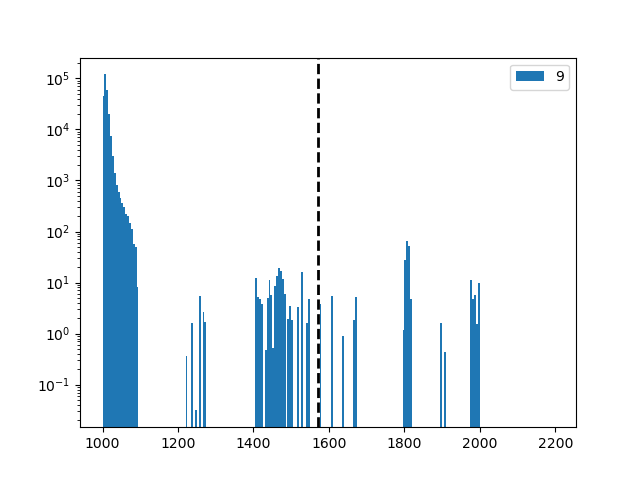

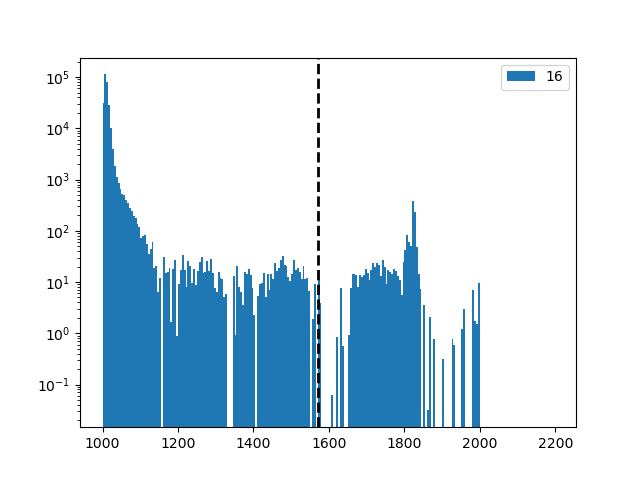

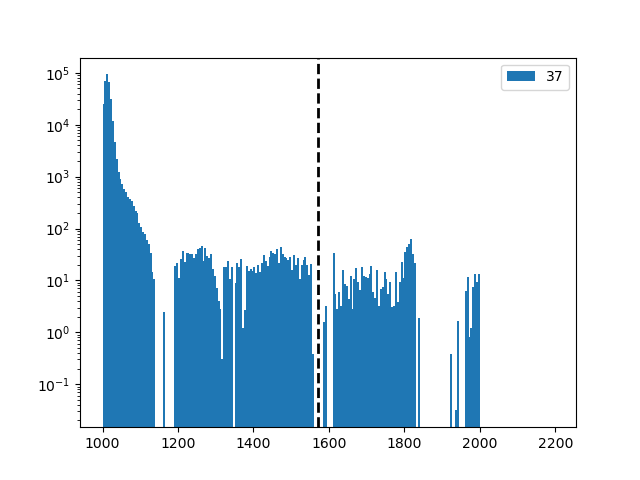

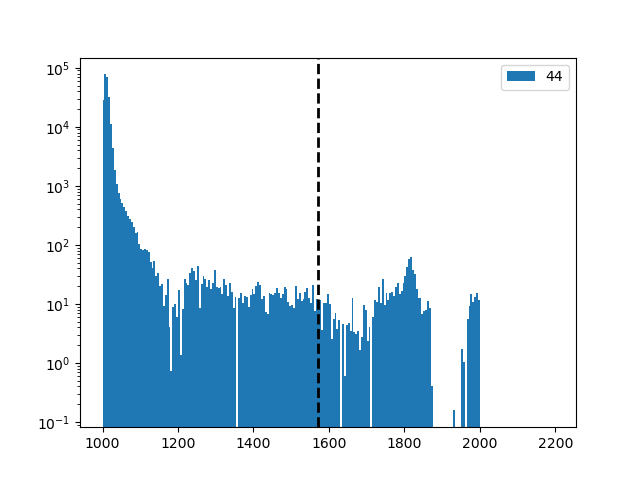

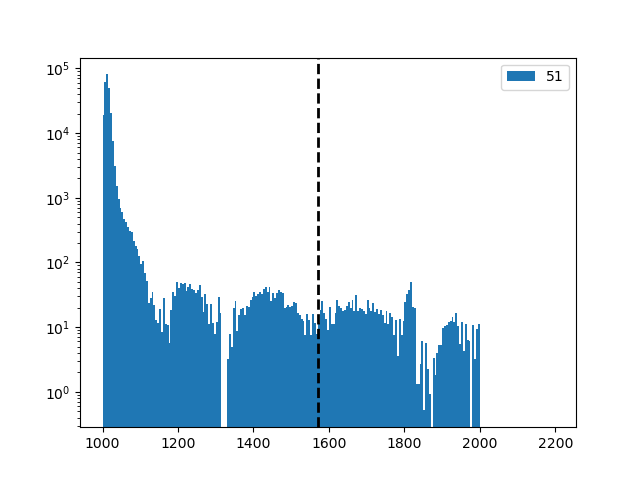

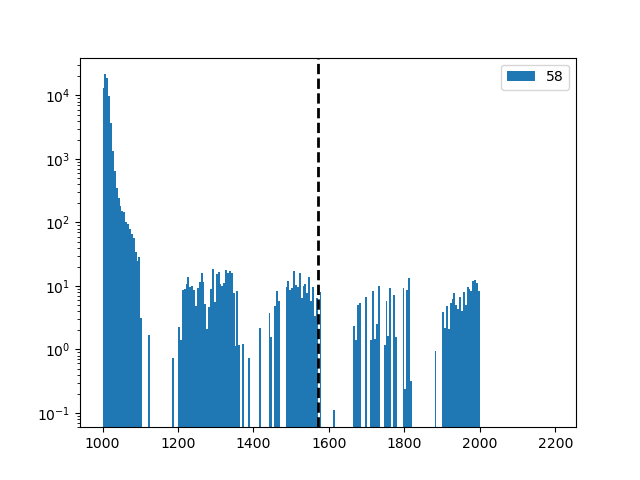

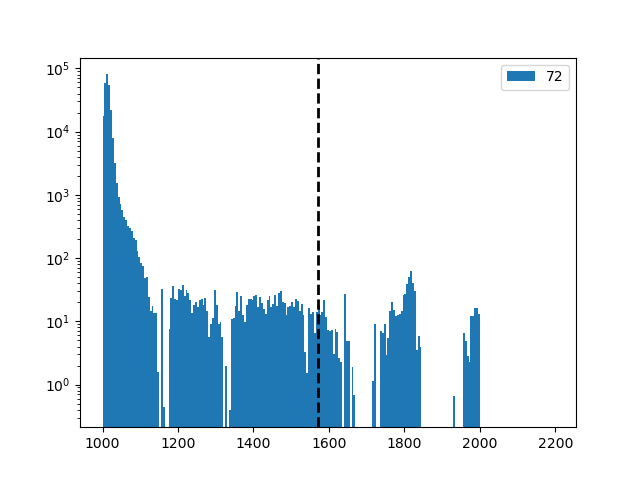

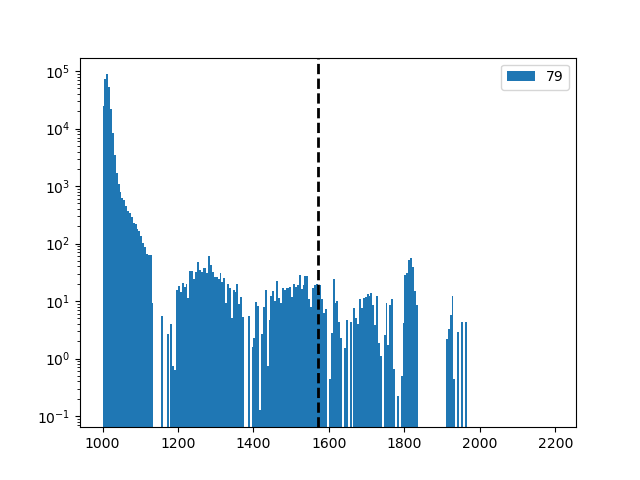

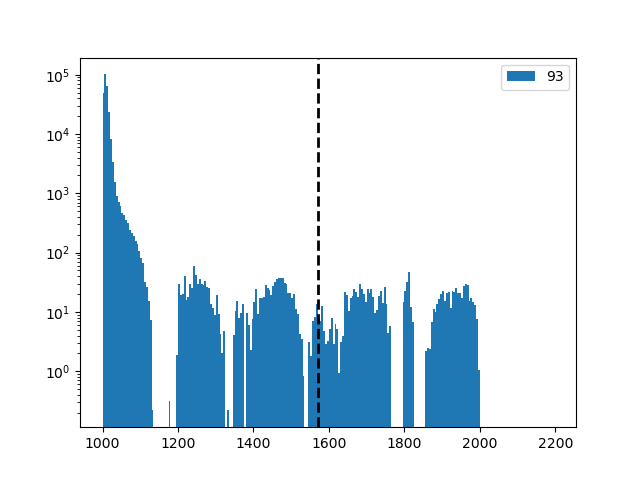

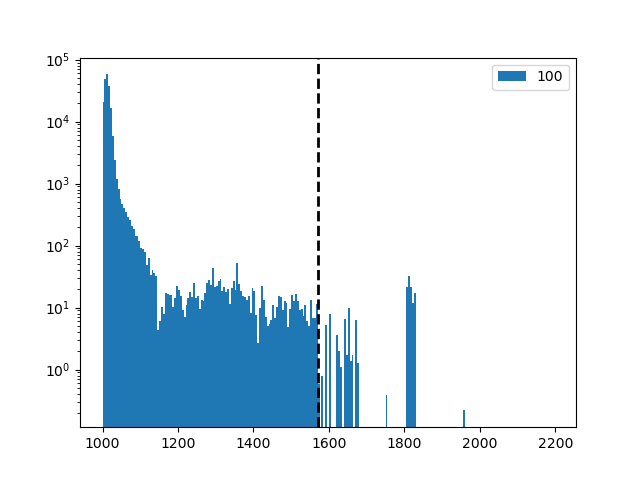

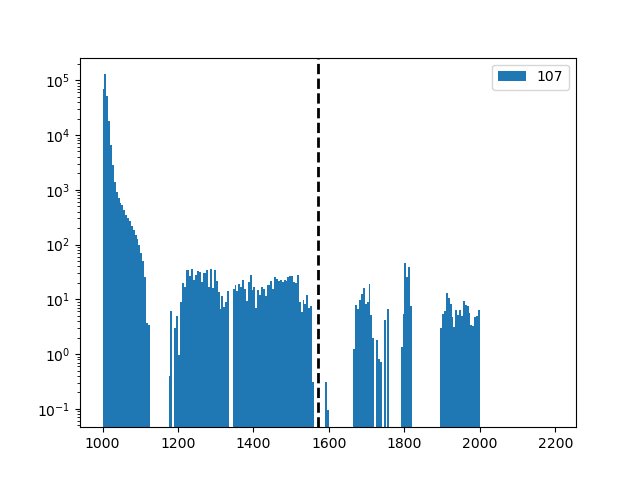

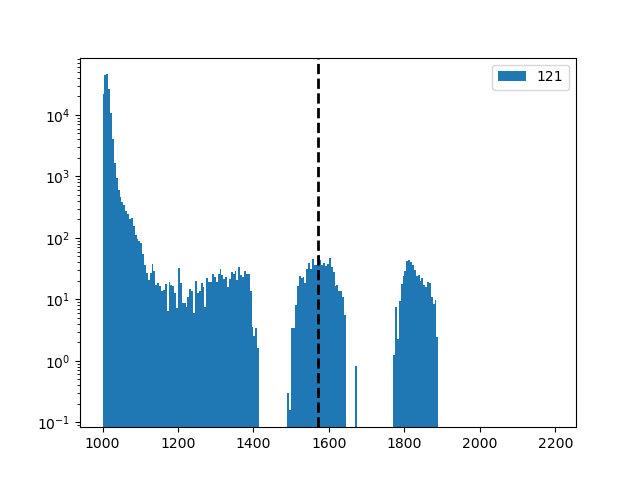

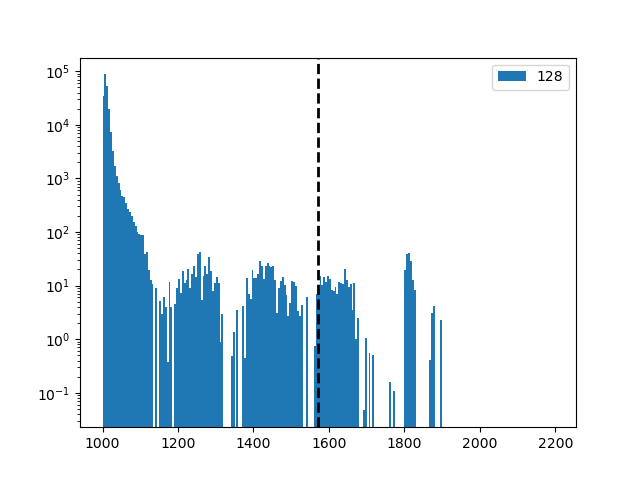

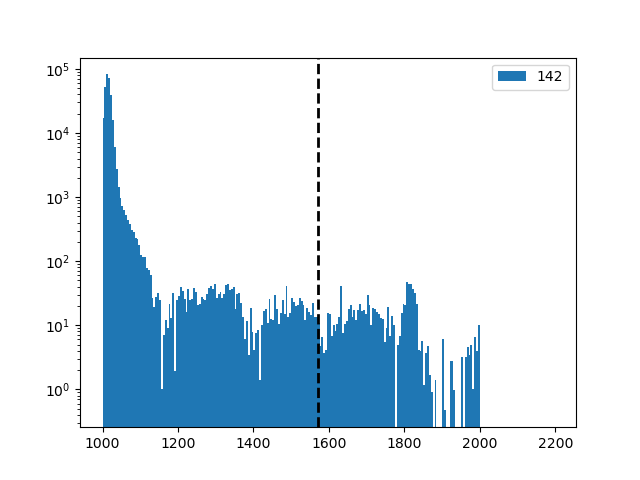

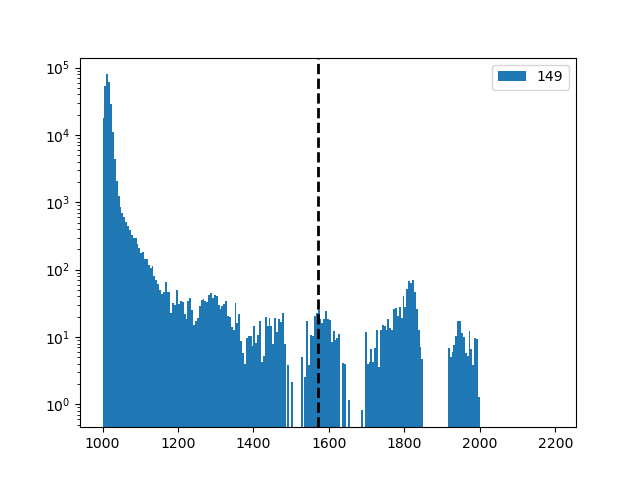

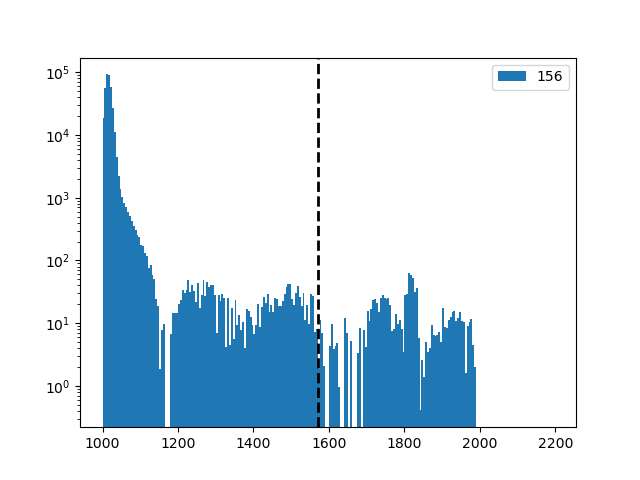

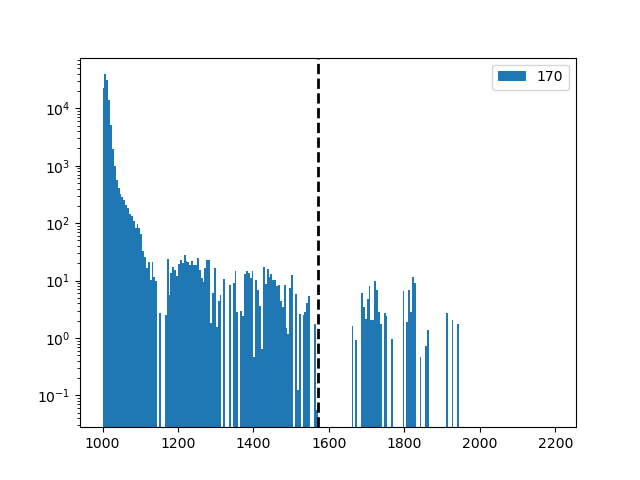

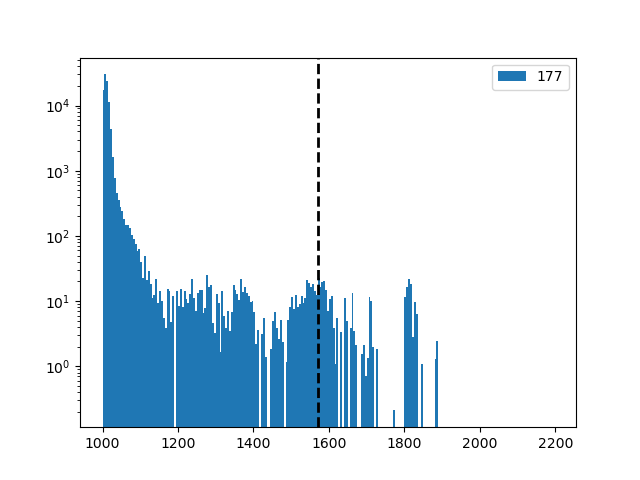

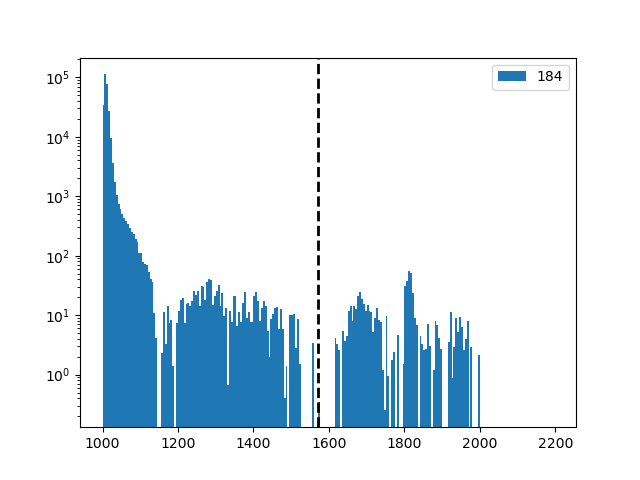

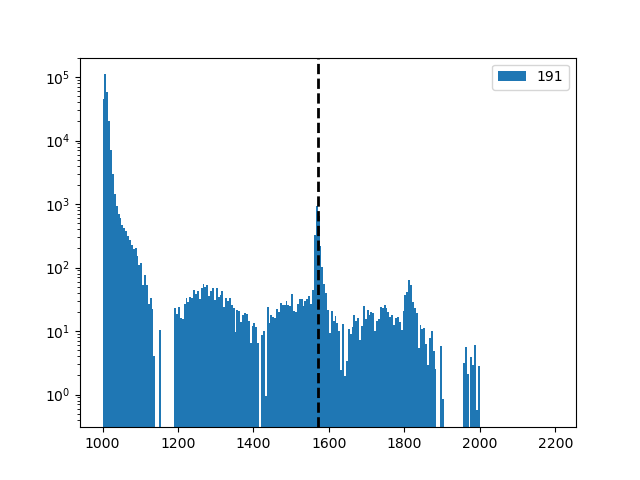

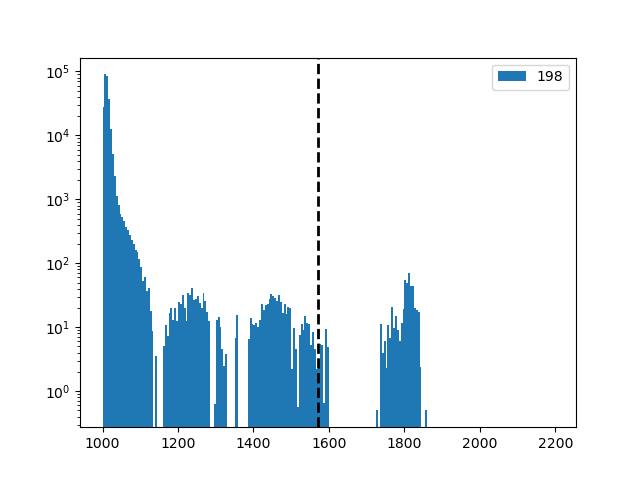

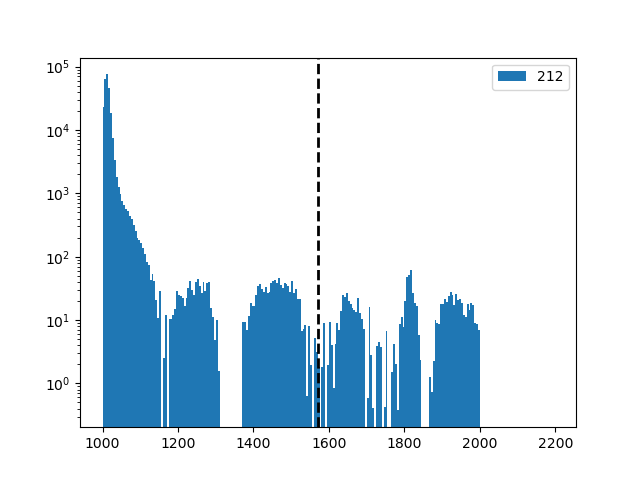

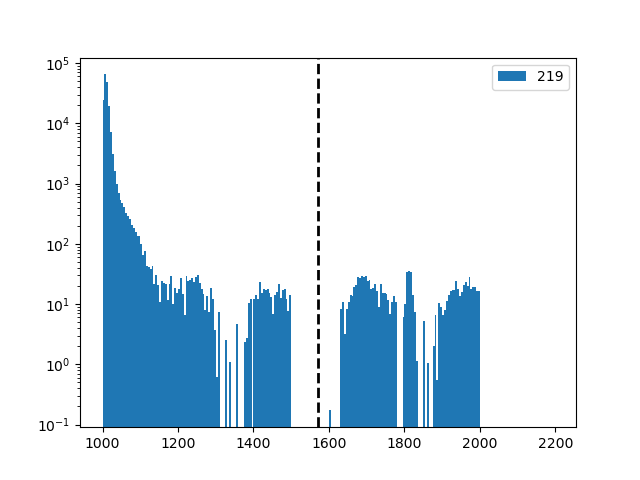

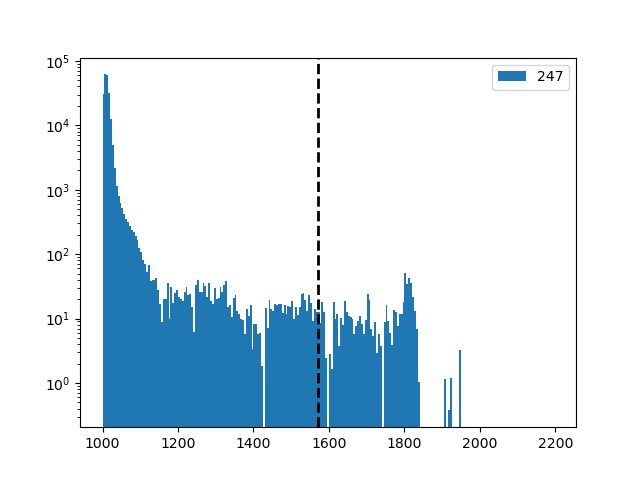

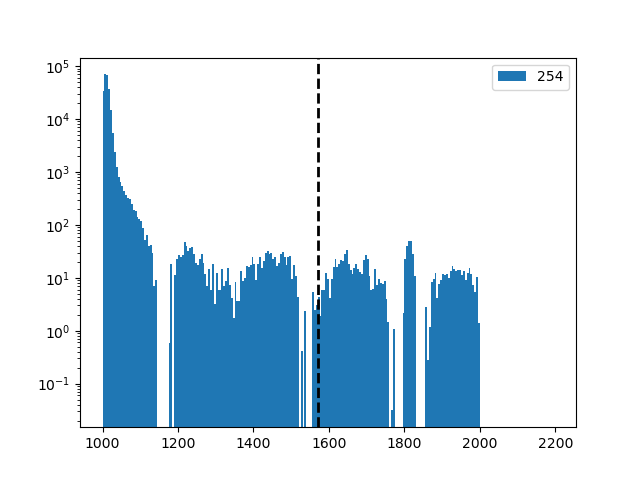

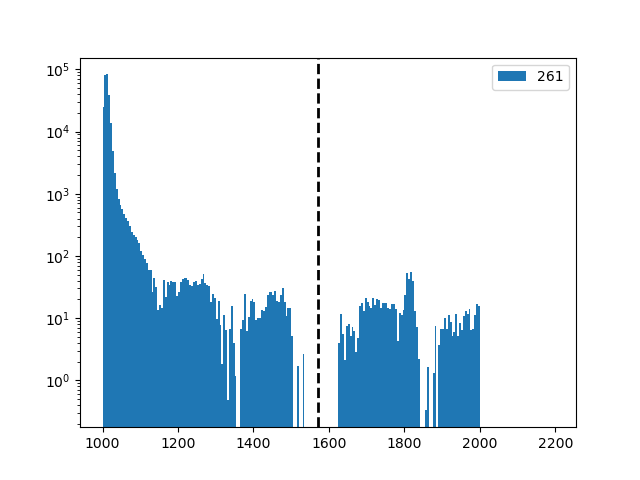

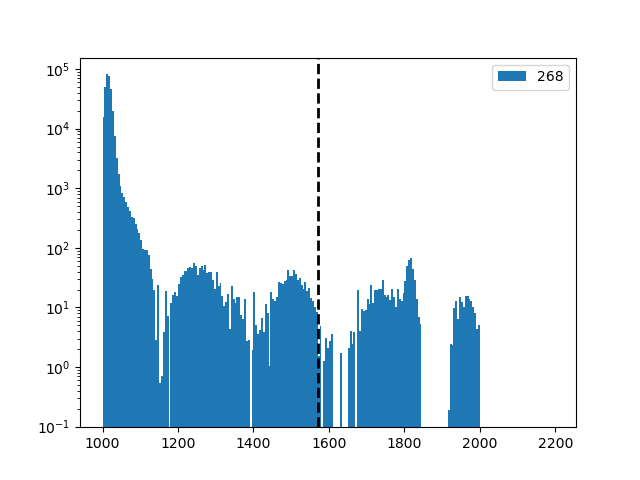

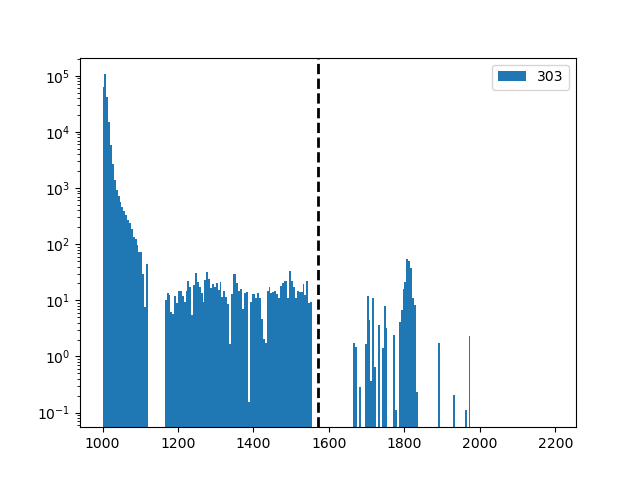

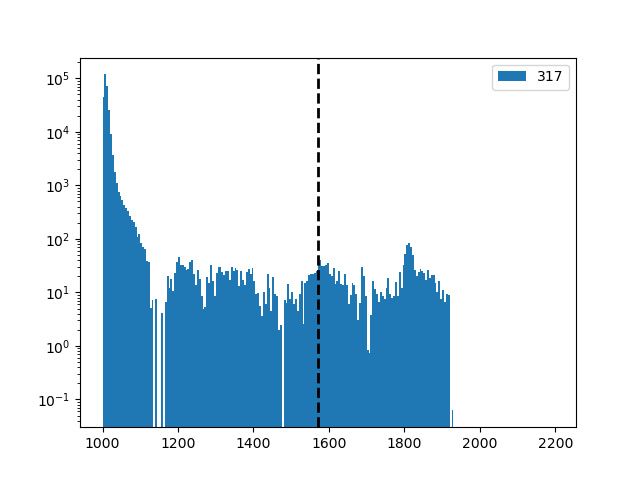

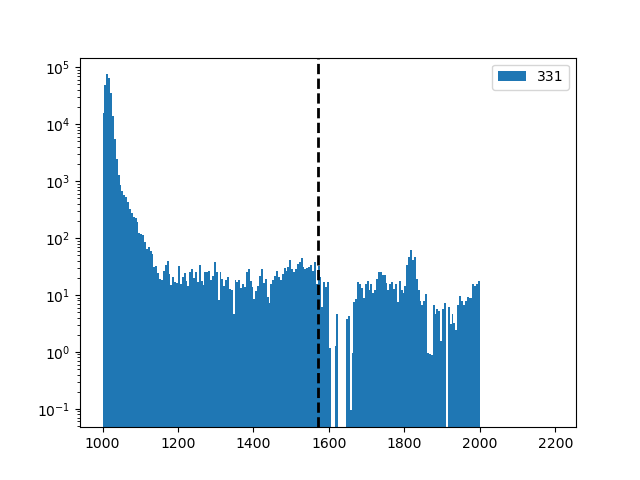

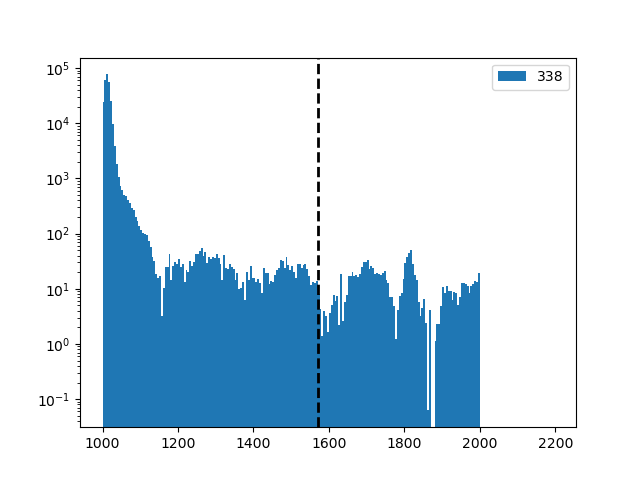

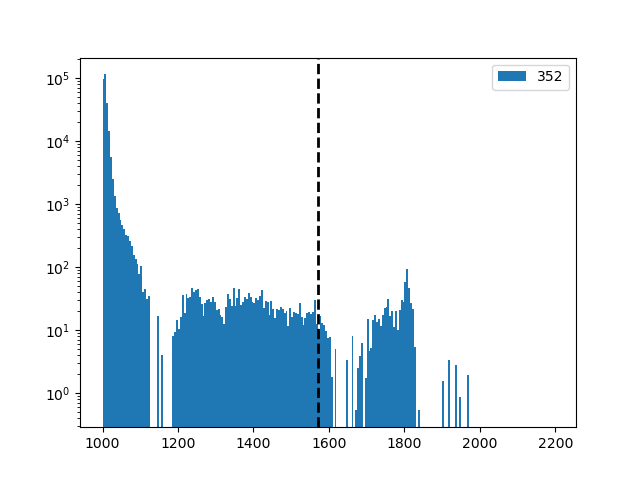

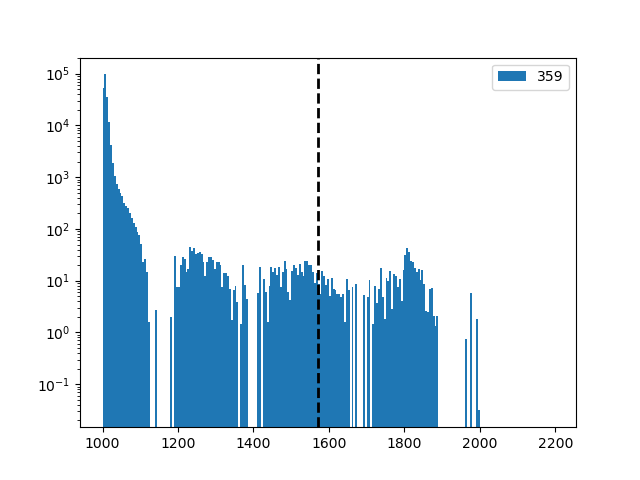

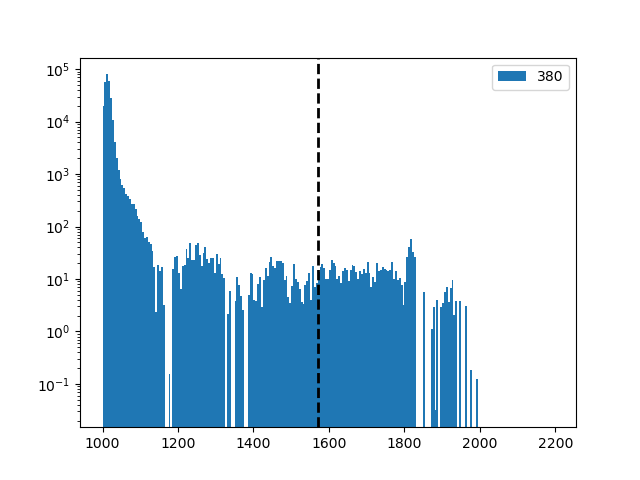

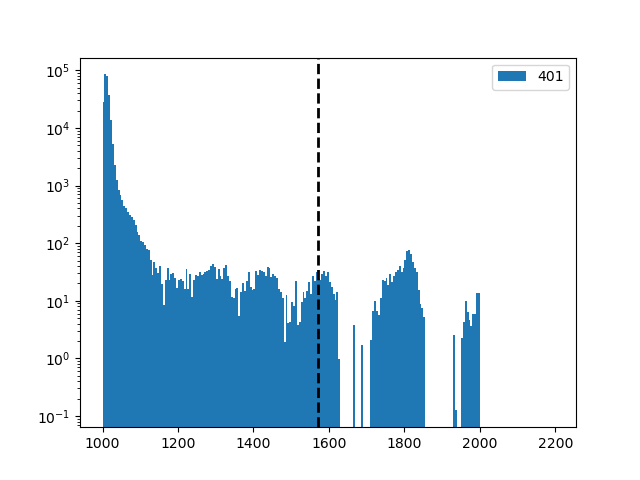

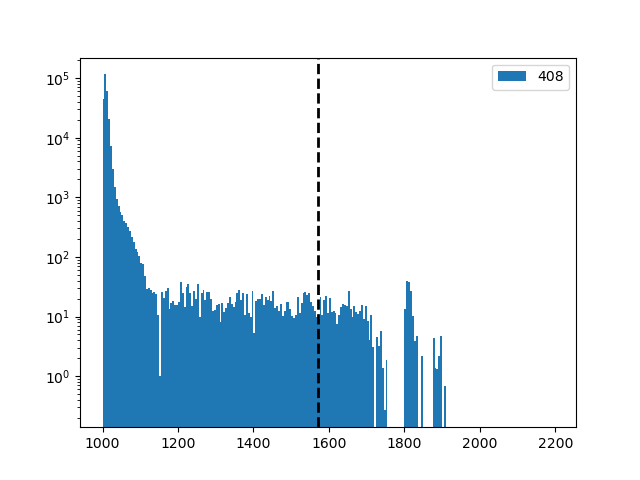

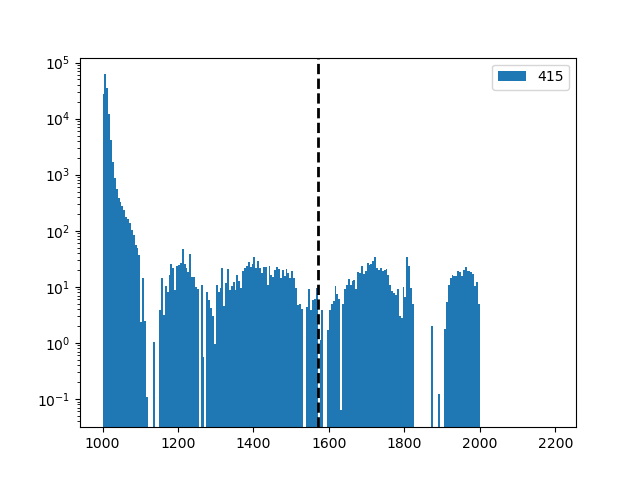

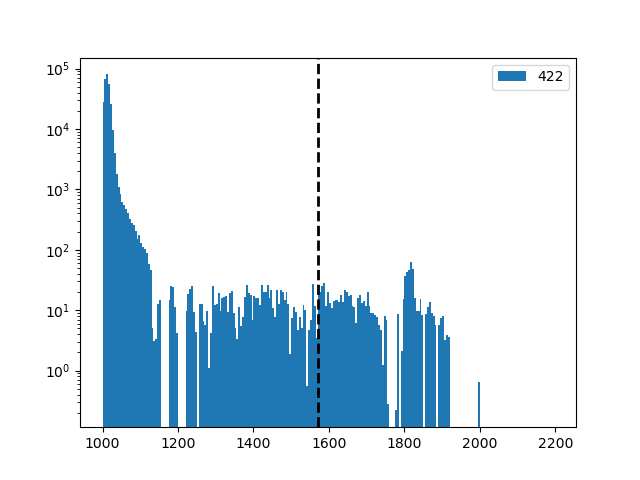

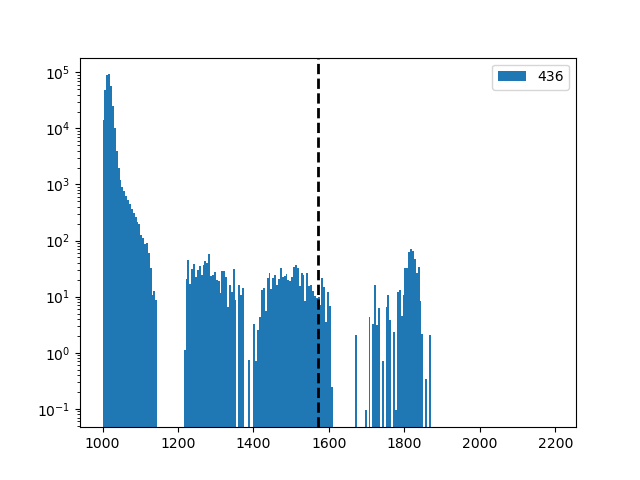

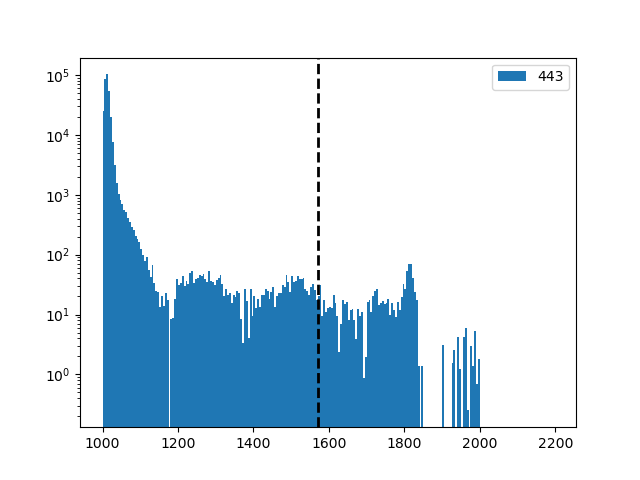

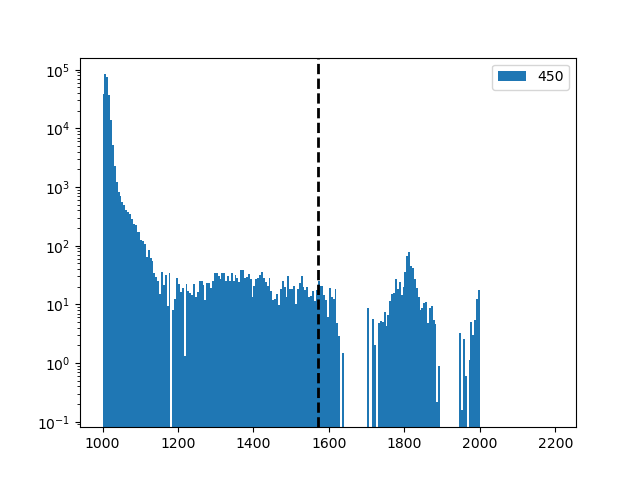

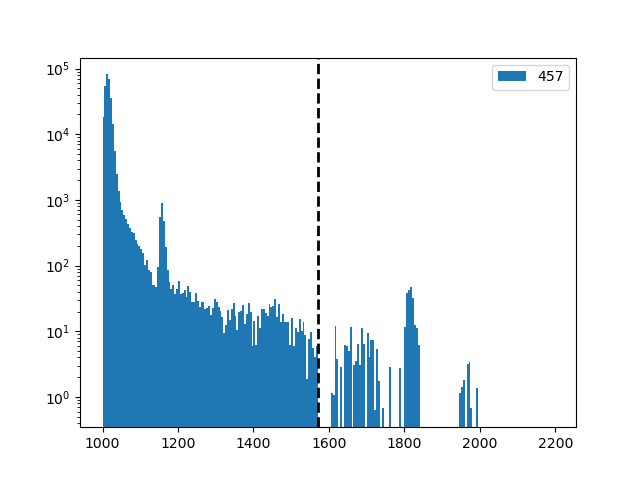

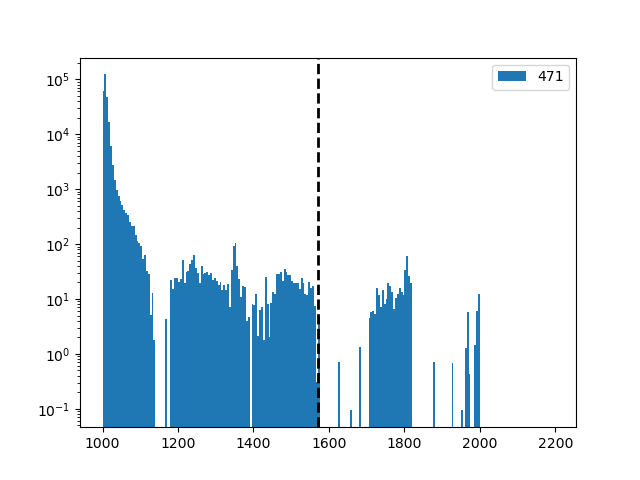

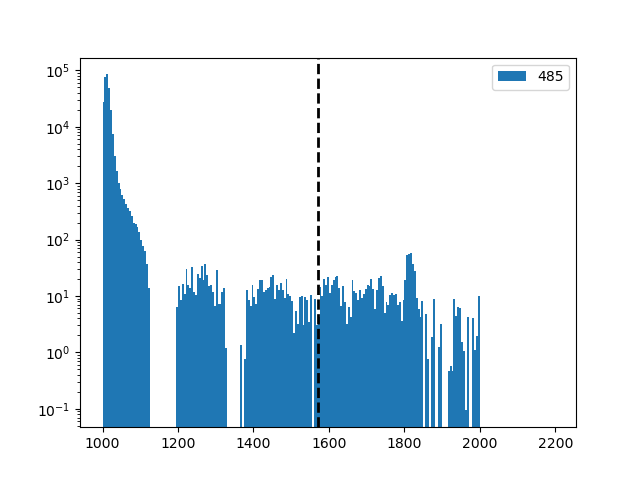

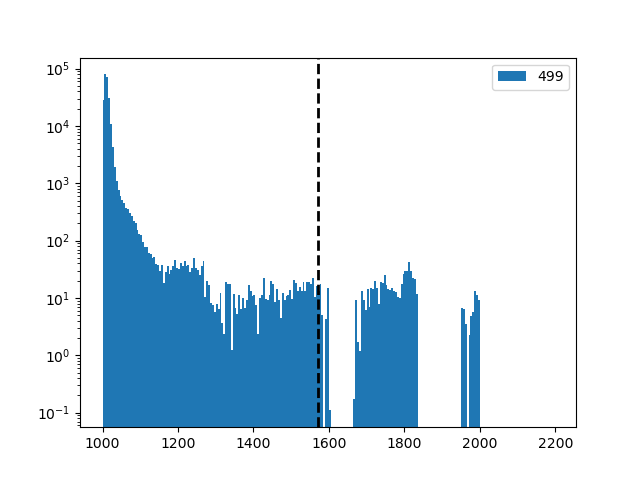

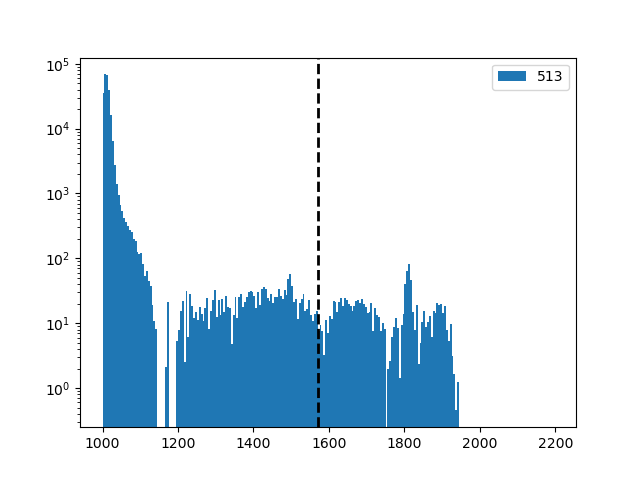

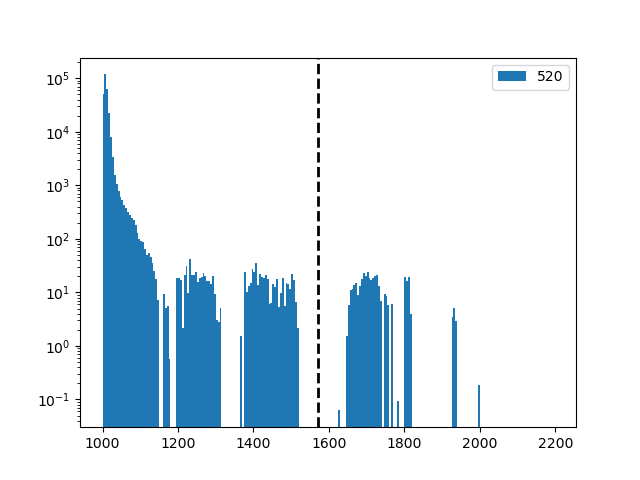

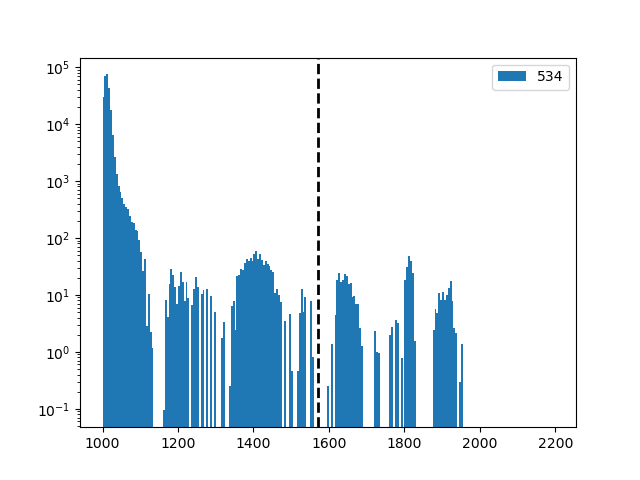

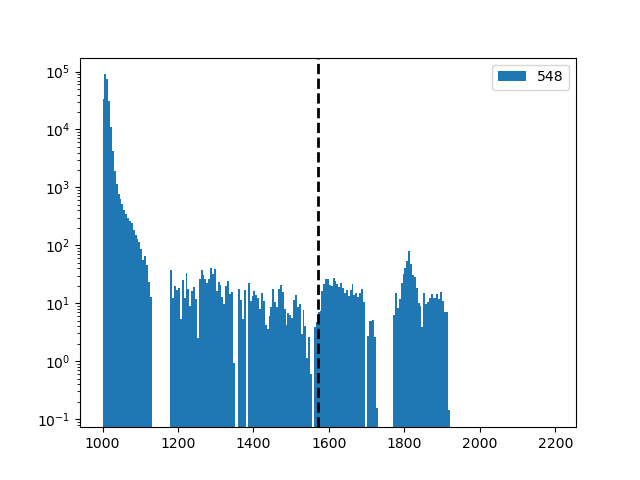

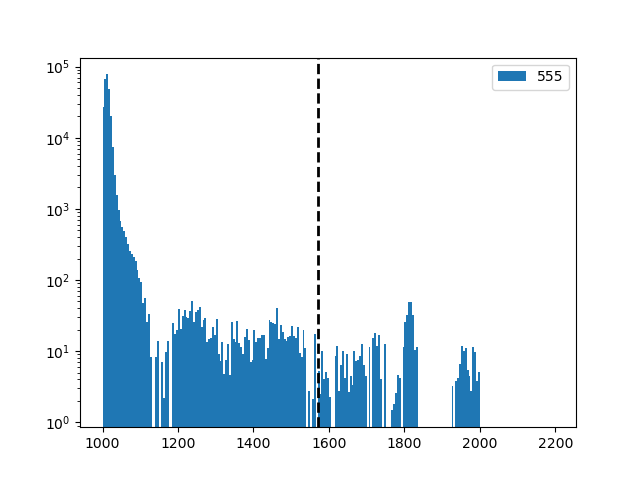

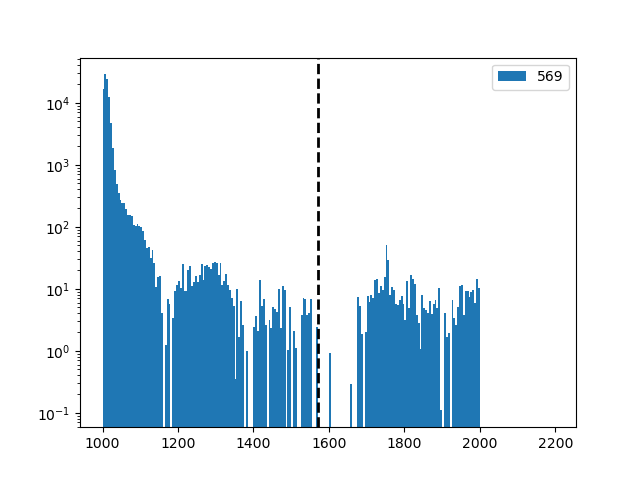

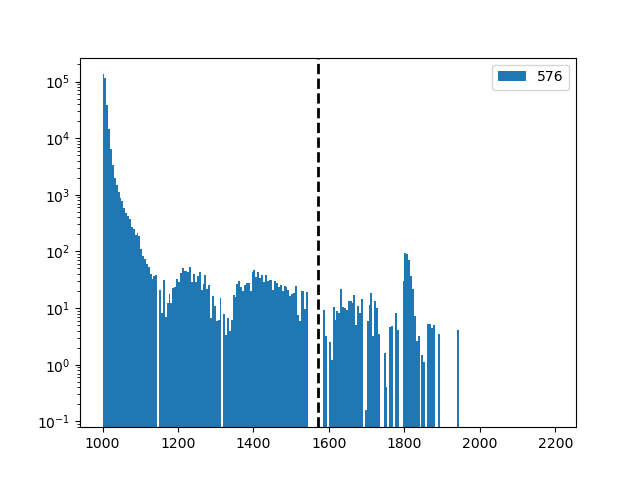

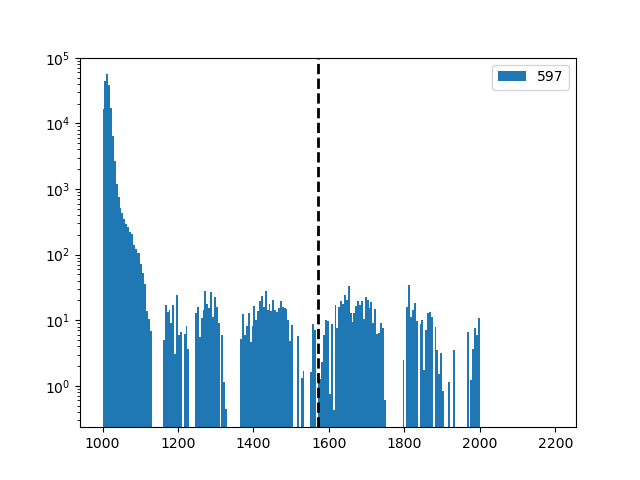

In [8]:

for eid in s2_pmaps_data.event.unique():
    plt.figure()
    s1s_data, s2s_data, s2sis, s1pmts, s2pmts = pmaps_data

    s2s_data   = s2s_data  .loc[lambda df: df.event == eid]
    plt.hist(s2s_data.time / 1e3, weights = s2s_data.ene, bins = np.arange(1000,2200,5), log = True, label = f"{eid}")
    plt.axvline(x=1570, color='k', linestyle='--', linewidth=2)

    plt.legend()



,event,peak,time,bwidth,ene
788,9,0,9.678671e+05,150.0,0.263297
789,9,0,9.684176e+05,1000.0,-2.806824
790,9,0,9.694283e+05,1000.0,-2.039917
791,9,0,9.704732e+05,1000.0,-1.637952
792,9,0,9.713952e+05,1000.0,-3.972695
...,...,...,...,...,...
75473,597,16,1.995454e+06,1000.0,1.580476
75474,597,16,1.996508e+06,1000.0,0.796220
75475,597,16,1.997578e+06,1000.0,5.257108
75476,597,16,1.998491e+06,1000.0,1.810919


,event,peak,time,bwidth,ene
788,9,0,9.678671e+05,150.0,0.263297
789,9,0,9.684176e+05,1000.0,-2.806824
790,9,0,9.694283e+05,1000.0,-2.039917
791,9,0,9.704732e+05,1000.0,-1.637952
792,9,0,9.713952e+05,1000.0,-3.972695
...,...,...,...,...,...
75473,597,16,1.995454e+06,1000.0,1.580476
75474,597,16,1.996508e+06,1000.0,0.796220
75475,597,16,1.997578e+06,1000.0,5.257108
75476,597,16,1.998491e+06,1000.0,1.810919


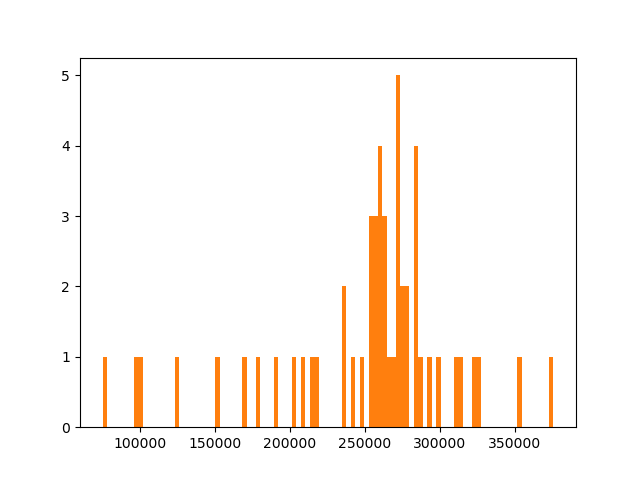

In [9]:
plt.figure()
display(s2_pmaps_data)
plt.hist(s2_pmaps_data.groupby("event").ene.sum(), bins = 100, log = False);


# Group by 'event', sum the energy ('ene') per event, and filter events based on the sum
event_energy_sum = s2_pmaps_data.groupby('event')['ene'].sum()

# Get events where summed energy is greater than or equal to the threshold
valid_events = event_energy_sum[ (event_energy_sum >= 50000)].index

# Filter the original DataFrame to include only these events
filtered_df = s2_pmaps_data[s2_pmaps_data['event'].isin(valid_events)]

display(filtered_df)

plt.hist(filtered_df.groupby("event").ene.sum(), bins = 100, log = False);